In [31]:
from dst_predict.imports import etl
from datetime import datetime, timezone
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

In [32]:
parse = etl.parse_dst_line(" Format                 IAGA-2002                                    |")
print(parse)

assert parse == "header"

parse = etl.parse_dst_line("DATE       TIME         DOY     DST                                  |")
print(parse)

assert parse == "header"

parse = etl.parse_dst_line("2000-01-01 00:00:00.000 001       -45.00")
print(parse)

expected_res = {
    "timestamp": datetime(2000, 1, 1, 0, 0, tzinfo=timezone.utc),
    "dst_nT": -45.0
}

assert parse == expected_res

header
header
{'timestamp': datetime.datetime(2000, 1, 1, 0, 0, tzinfo=datetime.timezone.utc), 'dst_nT': -45.0}


In [33]:
file = open("../datasets/WWW_dstae01508718.dat", 'r')
records = etl.read_records(file)
rec = None
with file as f:
    rec = next(records)

print(rec["header"])
for tbl in rec["data"]:
    print (tbl["timestamp"].strftime("%Y-%m-%d %H:%M:%S"), " | " , tbl["dst_nT"])

{'format': 'IAGA-2002', 'source': 'WDC for Geomagnetism, Kyoto', 'station': 'Equatorial Dst index', 'iaga_code': 'DST', 'interval': '1-hour', 'data_type': 'Final'}
2000-01-01 00:00:00  |  -45.0
2000-01-01 01:00:00  |  -37.0
2000-01-01 02:00:00  |  -37.0
2000-01-01 03:00:00  |  -41.0
2000-01-01 04:00:00  |  -45.0
2000-01-01 05:00:00  |  -39.0
2000-01-01 06:00:00  |  -38.0
2000-01-01 07:00:00  |  -35.0
2000-01-01 08:00:00  |  -38.0
2000-01-01 09:00:00  |  -30.0
2000-01-01 10:00:00  |  -23.0
2000-01-01 11:00:00  |  -21.0
2000-01-01 12:00:00  |  -22.0
2000-01-01 13:00:00  |  -23.0
2000-01-01 14:00:00  |  -21.0
2000-01-01 15:00:00  |  -22.0
2000-01-01 16:00:00  |  -21.0
2000-01-01 17:00:00  |  -23.0
2000-01-01 18:00:00  |  -24.0
2000-01-01 19:00:00  |  -27.0
2000-01-01 20:00:00  |  -25.0
2000-01-01 21:00:00  |  -26.0
2000-01-01 22:00:00  |  -28.0
2000-01-01 23:00:00  |  -28.0
2000-01-02 00:00:00  |  -24.0
2000-01-02 01:00:00  |  -23.0
2000-01-02 02:00:00  |  -24.0
2000-01-02 03:00:00  |  -2

In [34]:
def visualize_record(rec):
    header = rec.get("header", {})
    station = header.get("station", "Unknown Station")

    timestamps = [tbl["timestamp"] for tbl in rec["data"]]
    dst_values = [tbl["dst_nT"] for tbl in rec["data"]]

    plt.figure(figsize=(12, 5))
    plt.plot(timestamps, dst_values, color='navy', linewidth=0.8)

    plt.title(f"{station} - Dst Index")
    plt.xlabel("Time")
    plt.ylabel("Dst (nT)")
    plt.grid(True)

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gcf().autofmt_xdate()

    plt.tight_layout()
    plt.show()

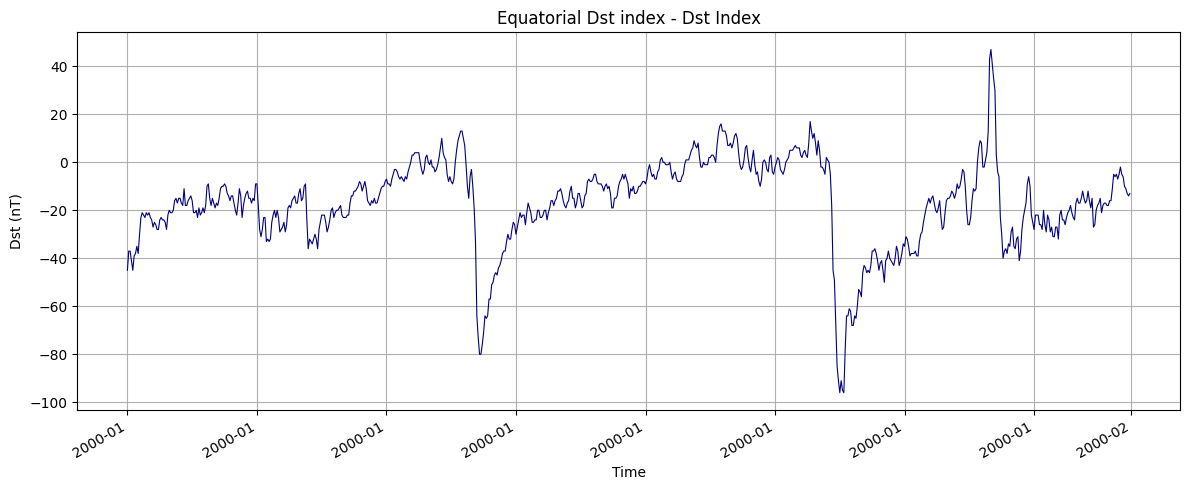

In [35]:
visualize_record(rec)